In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import sys
import numpy as np
np.set_printoptions(threshold=np.inf)

In [23]:
books = pd.read_csv('/content/drive/My Drive/Colab Notebooks/LabelMaster/LabelMaster Data/Books_ext.csv', index_col=0)
books

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Truckload (TL) Rates (rev/mi)_rates_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,...,National Avg. Diesel/Gal._y.1,Distillate Fuel Inventories (Mil Barrels/Day)_y.1,Change in Distillate Fuel Inventories_y.1,W. Texas Int. Crude Oil ($Bbl.)_y.1,Intermodal Revenue Movements (IANA-ETSO)_Total_y.1,Intermodal Revenue Movements (IANA-ETSO)_International_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_y.1,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_y.1,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_y.1","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_y.1",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_y.1,U.S. Origin Intermodal Volumes_International_y.1,U.S. Origin Intermodal Volumes_Domestic_y.1,U.S. Origin Intermodal Volumes_Total_y.1,Canada Origin Intermodal Volumes_International_y.1,Canada Origin Intermodal Volumes_Domestic_y.1,Canada Origin Intermodal Volumes_Total_y.1,Mexico Origin Intermodal Volumes_International_y.1,Mexico Origin Intermodal Volumes_Domestic_y.1,Mexico Origin Intermodal Volumes_Total_y.1,"N.A. Port Activity, Total TEUs_Imports_y.1","N.A. Port Activity, Total TEUs_Exports_y.1","N.A. Port Activity, Total TEUs_SA Imports_y.1","West Coast Port Activity, Total TEUs_Imports_y.1","West Coast Port Activity, Total TEUs_Exports_y.1","West Coast Port Activity, Total TEUs_SA Imports_y.1","East Coast Port Activity, Total TEUs_Imports_y.1","East Coast Port Activity, Total TEUs_Exports_y.1","East Coast Port Activity, Total TEUs_SA Imports_y.1","Gulf Coast Port Activity, Total TEUs_Imports_y.1","Gulf Coast Port Activity, Total TEUs_Exports_y.1","Gulf Coast Port Activity, Total TEUs_SA Imports_y.1","Western Canadian Port Activity, Total TEUs_Import

In [24]:
books = books.drop(books.index[155:157])
books

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Truckload (TL) Rates (rev/mi)_rates_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,...,National Avg. Diesel/Gal._y.1,Distillate Fuel Inventories (Mil Barrels/Day)_y.1,Change in Distillate Fuel Inventories_y.1,W. Texas Int. Crude Oil ($Bbl.)_y.1,Intermodal Revenue Movements (IANA-ETSO)_Total_y.1,Intermodal Revenue Movements (IANA-ETSO)_International_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_y.1,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_y.1,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_y.1","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_y.1",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_y.1,U.S. Origin Intermodal Volumes_International_y.1,U.S. Origin Intermodal Volumes_Domestic_y.1,U.S. Origin Intermodal Volumes_Total_y.1,Canada Origin Intermodal Volumes_International_y.1,Canada Origin Intermodal Volumes_Domestic_y.1,Canada Origin Intermodal Volumes_Total_y.1,Mexico Origin Intermodal Volumes_International_y.1,Mexico Origin Intermodal Volumes_Domestic_y.1,Mexico Origin Intermodal Volumes_Total_y.1,"N.A. Port Activity, Total TEUs_Imports_y.1","N.A. Port Activity, Total TEUs_Exports_y.1","N.A. Port Activity, Total TEUs_SA Imports_y.1","West Coast Port Activity, Total TEUs_Imports_y.1","West Coast Port Activity, Total TEUs_Exports_y.1","West Coast Port Activity, Total TEUs_SA Imports_y.1","East Coast Port Activity, Total TEUs_Imports_y.1","East Coast Port Activity, Total TEUs_Exports_y.1","East Coast Port Activity, Total TEUs_SA Imports_y.1","Gulf Coast Port Activity, Total TEUs_Imports_y.1","Gulf Coast Port Activity, Total TEUs_Exports_y.1","Gulf Coast Port Activity, Total TEUs_SA Imports_y.1","Western Canadian Port Activity, Total TEUs_Import

### Drop columns with null values

In [25]:
sum(books.isnull().sum()!=0)

188

There are 188 columns contain null values.

In [26]:
books = books.dropna(axis=1, how='any')

In [27]:
sum(books.isnull().sum()!=0)

0

In [28]:
books

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,Contract TL Reefer Rates w/Fuel_rates_m_trucking,...,Retail Sales (Mil $)_y.1,Consumer Price Index_y.1,Consumer Confidence (Conference Board)_y.1,National Avg. Diesel/Gal._y.1,Distillate Fuel Inventories (Mil Barrels/Day)_y.1,Change in Distillate Fuel Inventories_y.1,W. Texas Int. Crude Oil ($Bbl.)_y.1,Intermodal Revenue Movements (IANA-ETSO)_Total_y.1,Intermodal Revenue Movements (IANA-ETSO)_International_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_y.1,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_y.1,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_y.1","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_y.1",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_y.1,U.S. Origin Intermodal Volumes_International_y.1,U.S. Origin Intermodal Volumes_Domestic_y.1,U.S. Origin Intermodal Volumes_Total_y.1,Canada Origin Intermodal Volumes_International_y.1,Canada Origin Intermodal Volumes_Domestic_y.1,Canada Origin Intermodal Volumes_Total_y.1,"N.A. Port Activity, Total TEUs_Imports_y.1","N.A. Port Activity, Total TEUs_Exports_y.1","N.A. Port Activity, Total TEUs_SA Imports_y.1","West Coast Port Activity, Total TEUs_Imports_y.1","West Coast Port Activity, Total TEUs_Exports_y.1","West Coast Port Activity, Total TEUs_SA Imports_y.1","East Coast Port Activity, Total TEUs_Imports_y.1","East Coast Port Activity, Total TEUs_Exports_y.1","East Coast Port Activity, Total TEUs_SA Imports_y.1","Gulf Coast Port Activity, Total TEUs_Imports_y.1","Gulf Coast Port Activity, Total TEUs_Exports_y.1","Gulf Coast Port Activity, Total TEUs_SA Imports_y.1","Western Canadian Port Activity, Total TEUs_Imports_y.1","Western Canadian Port Activity, Total

453 columns are left after dropping columns contain null values

### Check whethere there are duplicate columns

In [29]:
def getDuplicateColumns(df): 
    duplicateColumnNames = set()  
    # Iterate through all the columns  
    # of dataframe 
    for x in range(df.shape[1]):     
        # Take column at xth index. 
        col = df.iloc[:, x] 
        # Iterate through all the columns in 
        # DataFrame from (x + 1)th index to 
        # last index 
        for y in range(x + 1, df.shape[1]): 
            # Take column at yth index. 
            otherCol = df.iloc[:, y] 
            # Check if two columns at x & y 
            # index are equal or not, 
            # if equal then adding  
            # to the set 
            if col.equals(otherCol): 
                duplicateColumnNames.add(df.columns.values[y])      
    # Return list of unique column names  
    # whose contents are duplicates. 
    return list(duplicateColumnNames) 

In [30]:
dups = getDuplicateColumns(books)
dups

['West Coast Port Activity, Total TEUs_SA Imports_y',
 'Unemployment Rate (%)_y',
 'Intermodal Revenue Movements (IANA-ETSO)_International_x.1',
 'ISM Manufacturing Index_y.1',
 "Truck Transportation Employment (000's)_y.1",
 'Change in Distillate Fuel Inventories_y',
 'Total Intermodal (w/o FSC)_x',
 'Chemicals Index_x.1',
 'National Avg. Diesel/Gal._y',
 'N.A. Port Activity, Total TEUs_Exports_y',
 'Non-Durable Manufacturing Index_y',
 'TTWEMP_driver_indicators_m_trucking',
 'East Coast Port Activity, Total TEUs_Imports_x.1',
 'Canada Origin Intermodal Volumes_International_y',
 'Canada Origin Intermodal Volumes_International_x.1',
 'ISM Manufacturing Index_y',
 "West Coast Port Container Activity (TEU's)_y.1",
 'Retail Sales (Mil $)_y',
 'U.S. Origin Intermodal Volumes_International_y.1',
 'U.S. Origin Intermodal Volumes_Total_y.1',
 'Western Canadian Port Activity, Total TEUs_Imports_y.1',
 'Intermodal Revenue Movements (IANA-ETSO)_Domestic_y',
 'U.S. Origin Intermodal Volumes_Inte

In [31]:
books = books.drop(columns=dups)
books

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,Contract TL Reefer Rates w/Fuel_rates_m_trucking,...,BUILD FOR_Liquid_Tank,BUILD FOR_Dry_Tank,BUILD FOR_Dump,BUILD FOR_Lowbed,BUILD FOR_All_Other,BUILD FOR_MEMO_Total_Vans,BUILD FOR_MEMO_Total_Tanks,BUILD FOR_MEMO_Major_Voc,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,Intermodal Revenue Movements (IANA-ETSO)_International_x,Intermodal Revenue Movements (IANA-ETSO)_Domestic_x,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_x,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_x,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_x,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_x,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_x","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_x",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,U.S. Origin Intermodal Volumes_Domestic_x,U.S. Origin Intermodal Volumes_Total_x,Canada Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,Canada Origin Intermodal Volumes_Total_x,"N.A. Port Activity, Total TEUs_Imports_x","N.A. Port Activity, Total TEUs_Exports_x","N.A. Port Activity, Total TEUs_SA Imports_x","West Coast Port Activity, Total TEUs_Imports_x","West Coast Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_SA Imports_x","East Coast Port Activity, Total TEUs_Imports_x","East Coast Port Activity, Total TEUs_Exports_x","East Coast Port Activity, Total TEUs_SA Imports_x","Gulf Coast Port Activity, Total TEUs_Imports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_SA Imports_x","Western Canadian Port Activity, Total TEUs_Imports_x","Western Canadian Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_SA Imports_x"
0,2008-01,282604.11,576

In [12]:
corr_matrix = books.corr()

In [13]:
corr_matrix

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,Contract TL Reefer Rates w/Fuel_rates_m_trucking,Total TL Reefer Rates (w/o FSC)_rates_m_trucking,...,BUILD FOR_Liquid_Tank,BUILD FOR_Dry_Tank,BUILD FOR_Dump,BUILD FOR_Lowbed,BUILD FOR_All_Other,BUILD FOR_MEMO_Total_Vans,BUILD FOR_MEMO_Total_Tanks,BUILD FOR_MEMO_Major_Voc,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,Intermodal Revenue Movements (IANA-ETSO)_International_x,Intermodal Revenue Movements (IANA-ETSO)_Domestic_x,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_x,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_x,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_x,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_x,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_x","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_x",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,U.S. Origin Intermodal Volumes_Domestic_x,U.S. Origin Intermodal Volumes_Total_x,Canada Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,Canada Origin Intermodal Volumes_Total_x,"N.A. Port Activity, Total TEUs_Imports_x","N.A. Port Activity, Total TEUs_Exports_x","N.A. Port Activity, Total TEUs_SA Imports_x","West Coast Port Activity, Total TEUs_Imports_x","West Coast Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_SA Imports_x","East Coast Port Activity, Total TEUs_Imports_x","East Coast Port Activity, Total TEUs_Exports_x","East Coast Port Activity, Total TEUs_SA Imports_x","Gulf Coast Port Activity, Total TEUs_Imports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_SA Imports_x","Western Canadian Port Activity, Total TEUs_Imports_x","Western Canadian Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs

## Dimensionlity Reduction using Correaltion Matrix
Now that we have removed the duplicate columns, lets move ahead and find the corelated columns from the dataset.
The columns that are highly corelated can be eliminated to reduce the dimensionality. Following function creates the correlation matrix of all the exisiting columns and eliminates columns that are highly corelated.

In [33]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    print(len(dataset.columns))
correlation(books,0.9)


91


As we have kept the threshold of 0.9, we are left with 91 columns in the dataset.

In [34]:
books.columns

Index(['Year_Month', 'Sum of Sales',
       'FTR Truck Loadings (000s, SA)_freight_m_trucking',
       'FTR Active Truck Utilization (%, SA)_freight_m_trucking',
       'Reefer Trailer Loadings (000s, SA)_freight_m_trucking',
       'Tank Trailer Loadings (000s, SA)_freight_m_trucking',
       'Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking',
       'Chemicals & Allied Products (000s, SA)_freight_m_trucking',
       'Transportation Equipment (000s, SA)_freight_m_trucking',
       'Spot TL Rates (w/o FSC)_rates_m_trucking',
       'Contract TL Rates (w/o FSC)_rates_m_trucking',
       'Contract TL Rates w/Fuel_rates_m_trucking',
       'Spot TL Flatbed Rates w/Fuel_rates_m_trucking',
       'Total LTL (w/o FSC)_rates_m_trucking',
       'Total LTL (w/ FSC)_rates_m_trucking',
       'Contract TL Tank Rates (w/o FSC)_rates_m_trucking',
       'OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking',
       'New Truck Lead Time (N.A. Backlog/Build Ratio, months)_indicat

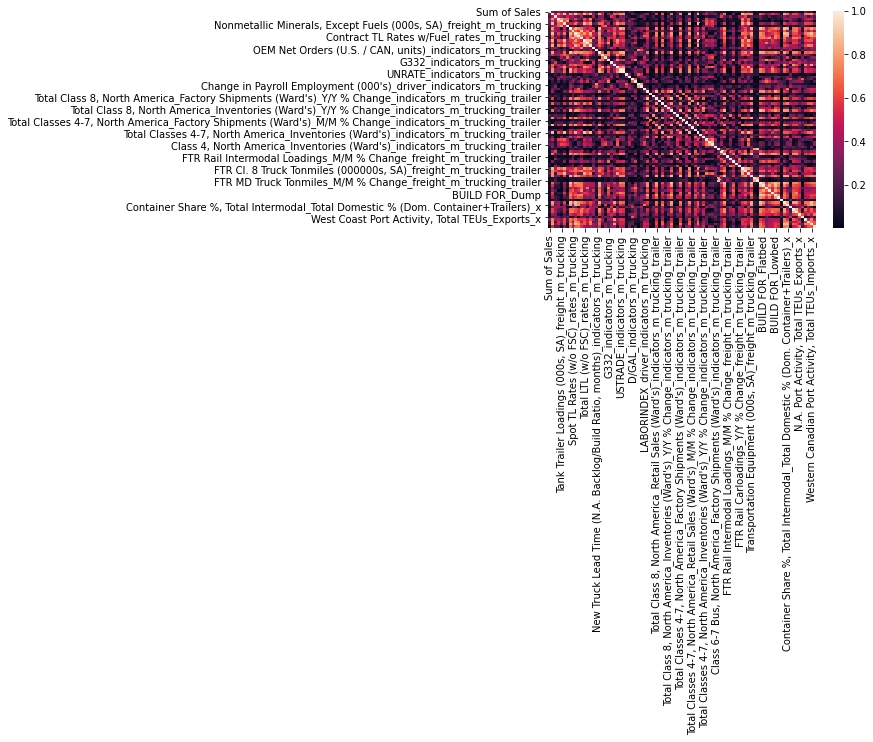

In [36]:
import seaborn as sns
sns.heatmap(books.corr().abs())